C:\Users\Astolfo\AppData\Local\Temp\ipykernel_6616\1592170591.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[clinical_features] = scaler.fit_transform(X[clinical_features])


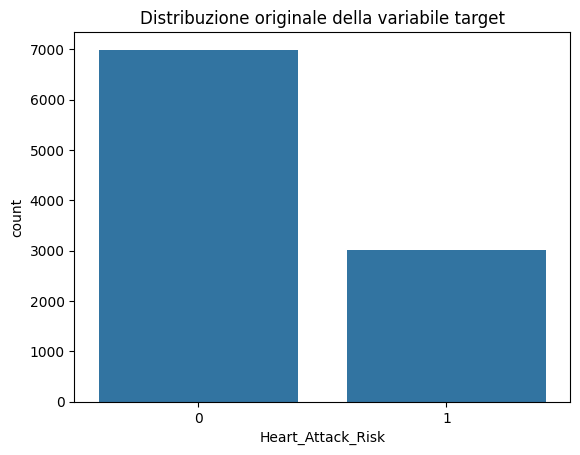

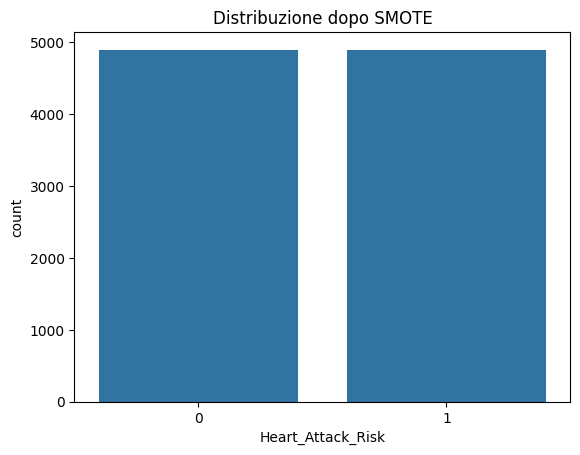

Best Parameters Found: {'n_estimators': 50, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 30}

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.77      0.73      2097
           1       0.29      0.22      0.25       903

    accuracy                           0.61      3000
   macro avg       0.50      0.50      0.49      3000
weighted avg       0.58      0.61      0.59      3000

Confusion Matrix:
[[1625  472]
 [ 707  196]]
ROC AUC Score: 0.4905512858901421


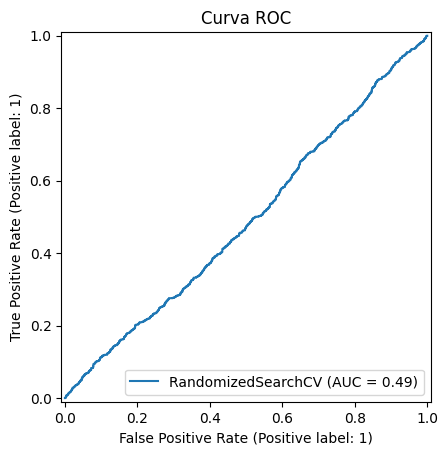

Modello salvato come 'best_rf_model.pkl'


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import joblib

# Caricamento del dataset
df = pd.read_csv("Heart_Attack_Prediction.csv")

# Mappatura della colonna 'Gender'
df.loc[:, 'Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Encoding delle colonne categoriche (escludendo la target)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col != 'Heart_Attack_Risk':
        le = LabelEncoder()
        df.loc[:, col] = le.fit_transform(df[col])

# Selezione delle feature cliniche
clinical_features = ['Cholesterol_Level', 'LDL_Level', 'HDL_Level', 'Systolic_BP', 'Diastolic_BP']
X = df[clinical_features]
y = df['Heart_Attack_Risk']

# Normalizzazione
scaler = StandardScaler()
X[clinical_features] = scaler.fit_transform(X[clinical_features])

# Visualizzazione distribuzione originale
sns.countplot(x=y)
plt.title("Distribuzione originale della variabile target")
plt.show()

# Divisione in train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Bilanciamento con SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Visualizzazione distribuzione dopo SMOTE
sns.countplot(x=y_train)
plt.title("Distribuzione dopo SMOTE")
plt.show()



# Spazio di ricerca per RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'max_depth': [5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}

# Ottimizzazione con RandomizedSearchCV
opt = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=32,
    cv=StratifiedKFold(n_splits=3),
    scoring='f1',
    random_state=42,
    n_jobs=-1
)

# Addestramento
opt.fit(X_train, y_train)

# Valutazione
y_pred = opt.predict(X_test)
print("Best Parameters Found:", opt.best_params_)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, opt.predict_proba(X_test)[:, 1]))

# Curva ROC
RocCurveDisplay.from_estimator(opt, X_test, y_test)
plt.title("Curva ROC")
plt.show()

# Salvataggio del modello
joblib.dump(opt.best_estimator_, "best_rf_model.pkl")
print("Modello salvato come 'best_rf_model.pkl'")


ALTRI MODELLI


Decision Tree:

              precision    recall  f1-score   support

           0       0.70      0.64      0.67      2097
           1       0.31      0.37      0.34       903

    accuracy                           0.56      3000
   macro avg       0.51      0.51      0.51      3000
weighted avg       0.59      0.56      0.57      3000

ROC AUC Score: 0.5077733259188494


c:\Users\Astolfo\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:14:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost:

              precision    recall  f1-score   support

           0       0.69      0.72      0.71      2097
           1       0.29      0.26      0.28       903

    accuracy                           0.58      3000
   macro avg       0.49      0.49      0.49      3000
weighted avg       0.57      0.58      0.58      3000

ROC AUC Score: 0.5020616912522292


<Figure size 1000x800 with 0 Axes>

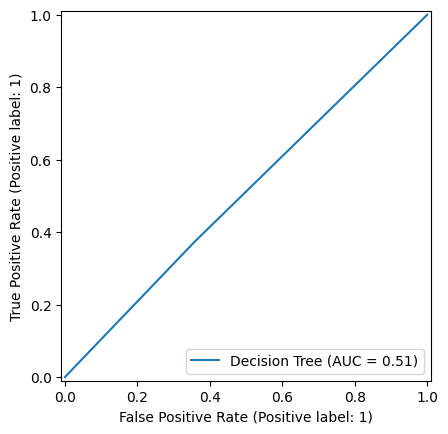

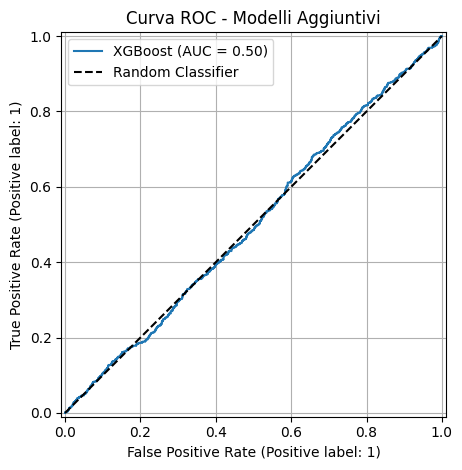

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Dizionario dei nuovi modelli
additional_models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Addestramento, valutazione e visualizzazione ROC
plt.figure(figsize=(10, 8))
for name, model in additional_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    print(f"\n{name}:\n")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
    
    RocCurveDisplay.from_estimator(model, X_test, y_test, name=name)

plt.title("Curva ROC - Modelli Aggiuntivi")
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


RANDOM FOREST

dovrebbe essere ancora meglio

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.79      0.74      2097
           1       0.31      0.21      0.25       903

    accuracy                           0.62      3000
   macro avg       0.50      0.50      0.50      3000
weighted avg       0.58      0.62      0.59      3000

Confusion Matrix:
[[1662  435]
 [ 712  191]]
ROC AUC Score: 0.5003282123753229


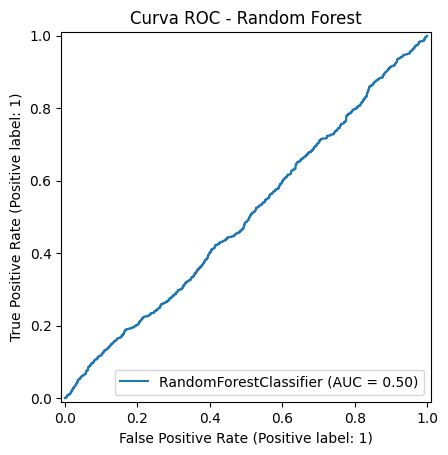

In [3]:

rf = RandomForestClassifier(
    max_depth=25,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=300,
    random_state=42
)
rf.fit(X_train, y_train)

# Predizione e valutazione
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

print("Random Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=0))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_rf))

# Curva ROC
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title("Curva ROC - Random Forest")
plt.show()

TRAINING DEI MODELLI DIVERSI PER I SUE CLUSTER


=== Lifestyle Features ===
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.61      0.63      1469
           1       0.59      0.62      0.61      1329

    accuracy                           0.62      2798
   macro avg       0.62      0.62      0.62      2798
weighted avg       0.62      0.62      0.62      2798

Confusion Matrix:
[[900 569]
 [502 827]]
ROC AUC Score: 0.6715680625067548


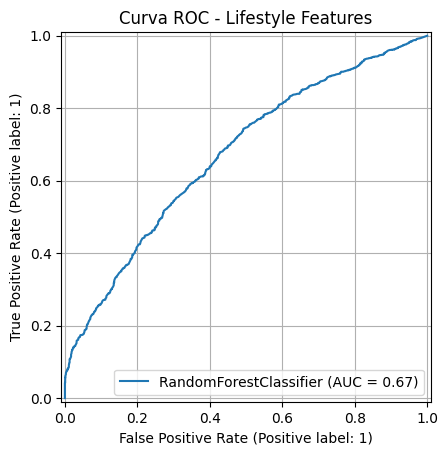


=== Clinical Features ===
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.71      0.74      1469
           1       0.70      0.76      0.73      1329

    accuracy                           0.73      2798
   macro avg       0.73      0.73      0.73      2798
weighted avg       0.74      0.73      0.73      2798

Confusion Matrix:
[[1044  425]
 [ 320 1009]]
ROC AUC Score: 0.8075665586402916


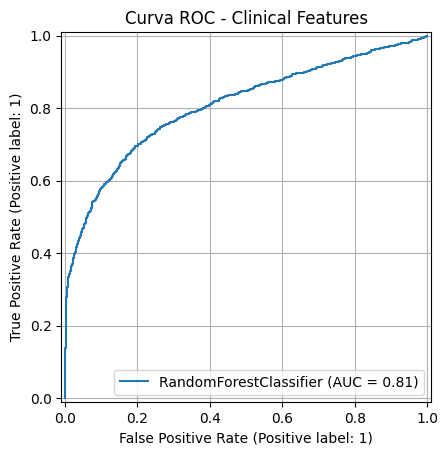

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
from imblearn.over_sampling import SMOTE

# Caricamento del dataset
df = pd.read_csv("Heart_Attack_Prediction.csv")

# Encoding della colonna 'Gender'
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Encoding delle colonne categoriche
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col != 'Heart_Attack_Risk':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

# Definizione dei cluster di feature
lifestyle_features = ['Smoking', 'Alcohol_Consumption', 'Physical_Activity', 'Diet_Score', 'Stress_Level']
clinical_features = ['Cholesterol_Level', 'LDL_Level', 'HDL_Level', 'Systolic_BP', 'Diastolic_BP']

# Funzione per addestrare e valutare un modello Random Forest
def train_and_evaluate_model(X, y, cluster_name):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

    rf = RandomForestClassifier(
        max_depth=25,
        min_samples_leaf=1,
        min_samples_split=2,
        n_estimators=300,
        random_state=42
    )
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)
    y_proba = rf.predict_proba(X_test)[:, 1]

    print(f"\n=== {cluster_name} Features ===")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

    RocCurveDisplay.from_estimator(rf, X_test, y_test)
    plt.title(f"Curva ROC - {cluster_name} Features")
    plt.grid(True)
    plt.show()

# Target
y = df['Heart_Attack_Risk']

# Modello per Lifestyle Features
X_lifestyle = df[lifestyle_features]
train_and_evaluate_model(X_lifestyle, y, "Lifestyle")

# Modello per Clinical Features
X_clinical = df[clinical_features]
train_and_evaluate_model(X_clinical, y, "Clinical")
